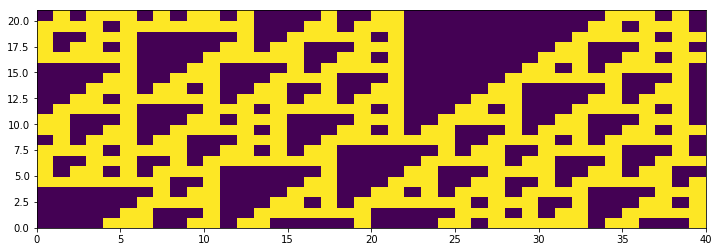

In [1]:
import KBs
reload(KBs)
import KBs
from KBs import *


##### Setup a rule
random.seed(0)
np.random.seed(30)

env = CA_sys(familyname='eca')
# env.family= kb_eca()
env.change_size((1,100,40**2))

env.alias = '110'
env.alias2rulestr()
hist = sample(env,T=20)
out = np.take(hist,0,axis=-1)
showsptime(out[::-1])
plt.show()


##### Formulation (Poorly written)

```
###################################
############oooo###################
#############oo####################
############xxxx###################
###################################
```

For each preimage we can define its possible images at time t. oooo->xxxx
Note for t > l//2 none of the cells in the image can be deterministically called (in general).

For each "xxxx" config $l$, we can define its cardinality/partition function as the number of possible preimages.

$$
N(l)=|\left \{ (F_t(l^-)=l  )\&  (l^- ~~ contains ~~ l_m )  \right\} | 
$$

Note the light cone $l^-$ is used because it uniquely specifies the image.

Its possible to calculate the expectation $E(\log(N(l)))$ with the exception $\log(0)=0$. Then for every middle section ($l_m$) of the light cone ($l^-$) we have two numbers

$$
F(l_m)=E[-\log(N(l))] \\
G(l_m,l)= -\log(N(l)) \\
F(l_m) = E[G(l_m,l)]
$$



let radius be $r=k/2$
then $|\{l\}| = 2^k$

$G$ is defined over $2^k\times 2^k$


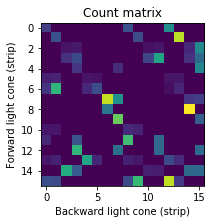

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


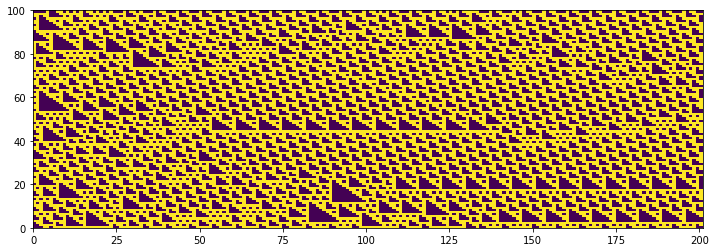

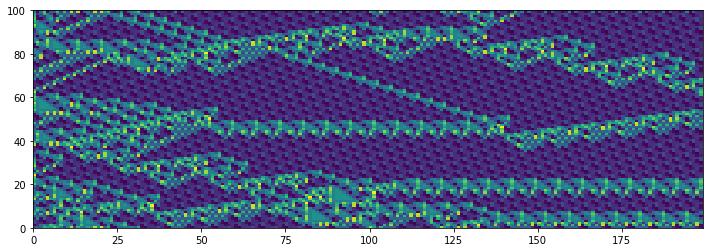

In [2]:
# MCOL = NCOMP

def entropise(x,axis=None,keepdims=0):
    '''
    Take the log, expectation is optional
    '''
    SUM = np.sum(x,axis=axis,keepdims=1).astype(float)
    SUM[SUM==0]=1.
    P = x/SUM
    ENT = -np.log(P)
    ENT[np.isinf(ENT)]=0
#     ENT = np.sum(,axis=axis,keepdims=keepdims)
    return ENT
    
def hist2matrix(hist,n=4,T=None):
    if T is None:
        T = n
    # out = np.take(hist,0,axis=-1)
    fir = np.reshape(2**np.arange(n)[::-1],(1,1,-1,1))
    out = convolve_int(hist,fir,'wrap')# fir*
    idx = zip(out[:-T].ravel(),
              out[T:].ravel())
    ct = collections.Counter(idx)    
    mat = np.zeros((2**n,2**n),np.int)
    idx = zip(*ct.keys())
    mat[idx] = ct.values()
    return mat

def main(env):
    n = 4
    T = 2
    hist = sample(env,T=200)
    hist = np.take(hist,[0],axis=-1)

    mat = hist2matrix(hist,n=n,T=T)
    plt.figure(figsize=[3,3])
    plt.imshow(mat)
    plt.xlabel('Backward light cone (strip)')
    plt.ylabel('Forward light cone (strip)')
    plt.title('Count matrix')
    plt.show()

    #### NCOMP: count of compatibility
    NCOMP = mat
    H0 = entropise(NCOMP,axis=0)
    H1 = entropise(NCOMP,axis=1)
    Hmut = entropise(NCOMP,axis=(0,1))
    
    ##### Setting matrix color
    MCOL = H0
    # MCOL = H1
    # MCOL = H0+H1-Hmut
    # MCOL = mat
    MCOL = Hmut
    T = 2

    env.change_size((1,100,100**2))
    hist = sample(env,T=200)
    out = np.take(hist,0,axis=-1)
    fir = np.reshape(2**np.arange(n)[::-1],(1,1,-1))
    out = convolve_int(out,fir,'wrap')# fir*
    
    #### Tidy up output
    SHAPE= out[T:].shape
    idx = [out[:-T].ravel(),out[T:].ravel()]
    out = np.reshape(MCOL[idx],SHAPE)

    showsptime(hist[:,:,:,0].T)
    showsptime(out.T)
    plt.show()

alias = '110'
env.alias= alias
env.alias2rulestr()
main(env)

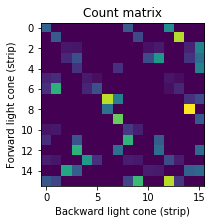

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


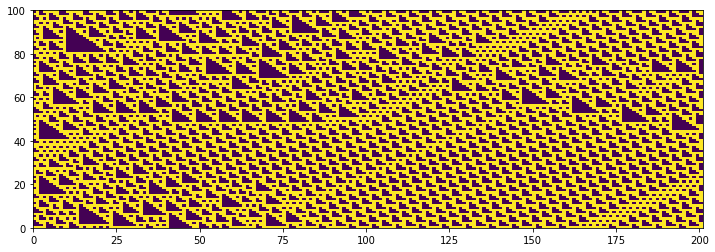

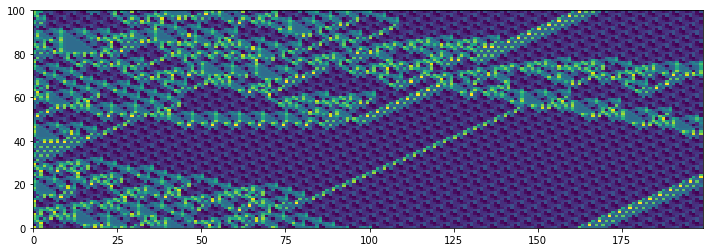

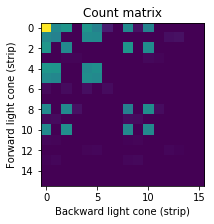

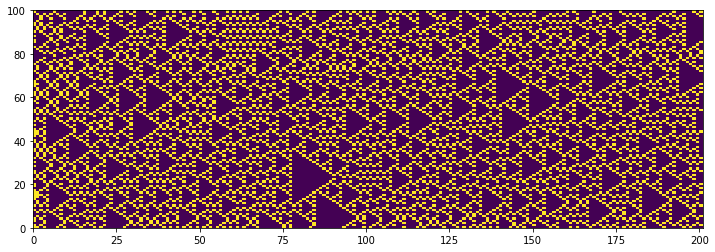

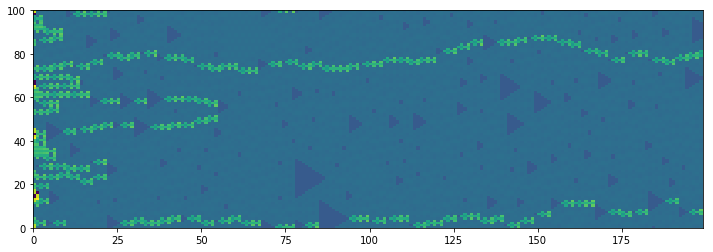

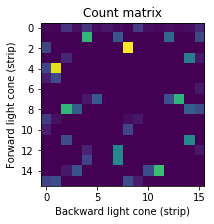

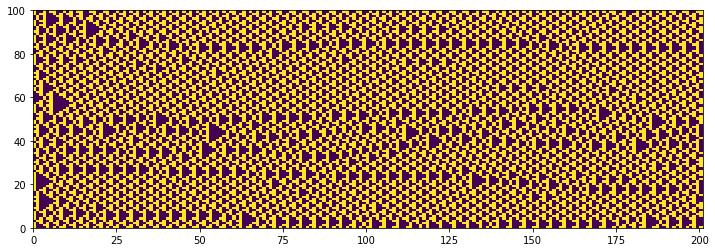

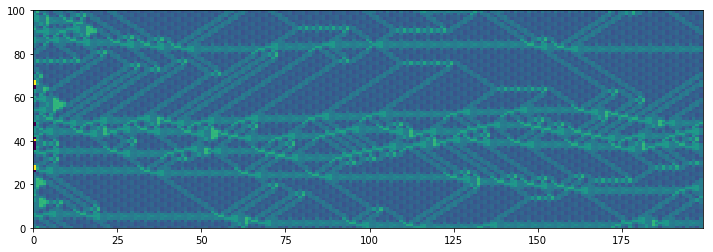

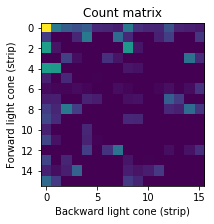

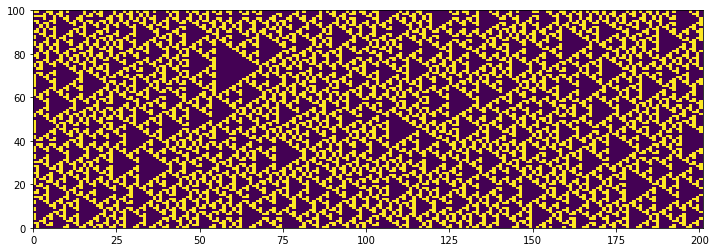

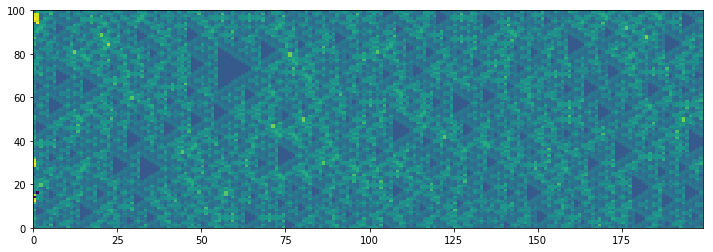

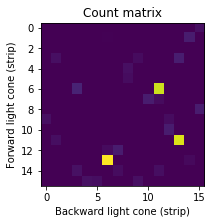

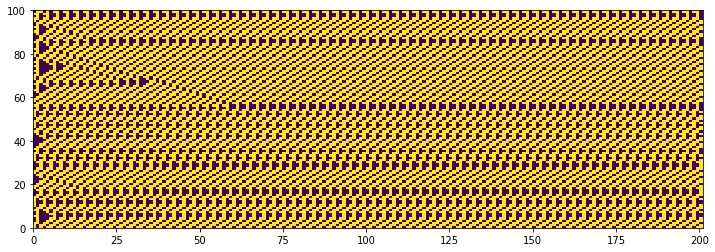

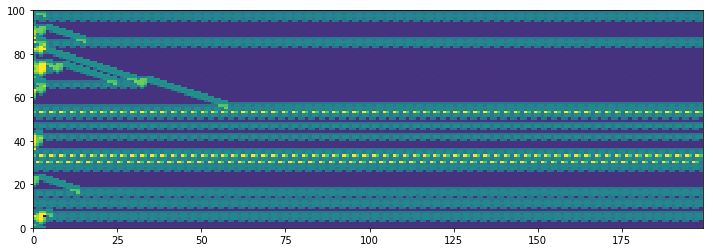

In [3]:
lst = ['110',
       '146',
       '54',
       '22',
      '118']

for alias in lst:
    env.alias= alias
    env.alias2rulestr()
    main(env)

In [4]:
###### Theoretical enumeration of combination of light-cones
##### Not so useful empircally


# from recur import *
# from pymisca.util import *
n = 4
T=n//4+1

l2lneg = par2tiles(env,n=n,T=T,per=None,merge=0,findall=1)
lst = [base2bin(str(x),10,n) for x in range(2**n)]
tile0 = {lst[i]: tile_flatten(x) for i,x in enumerate(l2lneg)}

### Number of preimages
d = tile0
NG = [len(v) for k,v in d.iteritems()]
print 'NG',NG
out = []
for query in lst:
    # query = '0000'
    # for query 
    query = tuple(map(int,query))
    compat = [filter(lambda seq: tuple(seq[2:][T:-T])== query,
                 tile) for k,tile in d.iteritems()]
    NCOMP =map(len,compat)
#     print 'NCOMP',NCOMP
    out.append(NCOMP)
NCOMP = np.array(out)
# print mat2str(NCOMP,sep='  ')
# print NCOMP.sum(axis=0)
# NCOMP
NCOMP = mat
plt.imshow(NCOMP)
plt.show()

H0 = entropise(NCOMP,axis=0)
plt.imshow(H0)
plt.show()


H1 = entropise(NCOMP,axis=1)
plt.imshow(H1)
plt.show()

Hmut = entropise(NCOMP,axis=(0,1))
plt.imshow(Hmut)
plt.show()


NG [26, 16, 35, 19, 25, 5, 4, 6, 10, 16, 24, 18, 5, 17, 11, 19]


NameError: name 'mat' is not defined